DATASET OVERVIEW
Shape: (11430, 89)
Columns: 89

TARGET VARIABLE ANALYSIS
Unique status values: ['legitimate' 'phishing']

Distribution:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Percentages:
status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64


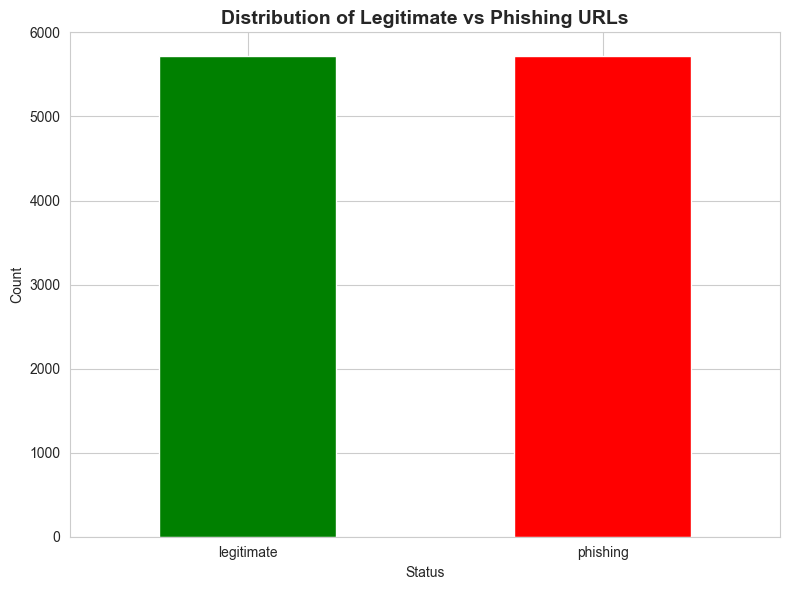


MISSING VALUES CHECK
✓ No missing values!

BASIC STATISTICS (First 10 features)
         length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min       

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
df = pd.read_csv('../data/raw/dataset_phishing.csv')

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")

# Check target variable
print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)
print(f"Unique status values: {df['status'].unique()}")
print(f"\nDistribution:")
print(df['status'].value_counts())
print(f"\nPercentages:")
print(df['status'].value_counts(normalize=True) * 100)

# Visualize distribution
plt.figure(figsize=(8, 6))
df['status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Legitimate vs Phishing URLs', fontsize=14, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../models/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Missing values
print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing[missing > 0])

# Basic statistics
print("\n" + "="*60)
print("BASIC STATISTICS (First 10 features)")
print("="*60)
print(df.iloc[:, 1:11].describe())

# Check if status needs encoding
print("\n" + "="*60)
print("TARGET ENCODING CHECK")
print("="*60)
if df['status'].dtype == 'object':
    print(f"✗ Status is STRING: {df['status'].unique()}")
    print("→ Need to encode to 0/1")
else:
    print(f"✓ Status is numeric: {df['status'].unique()}")
    print("→ Already encoded")


In [5]:
# Encode target variable
print("Encoding status column...")
status_mapping = {'legitimate': 0, 'phishing': 1}
df['status'] = df['status'].map(status_mapping)

print(f"✓ Encoded: {status_mapping}")
print(f"\nNew distribution:")
print(df['status'].value_counts())

# Verify
assert df['status'].isnull().sum() == 0, "Encoding created NaN values!"
assert df['status'].dtype in ['int64', 'int32'], "Status is not numeric!"

print("\n✓ Target successfully encoded as 0/1")


Encoding status column...
✓ Encoded: {'legitimate': 0, 'phishing': 1}

New distribution:
status
0    5715
1    5715
Name: count, dtype: int64

✓ Target successfully encoded as 0/1


In [6]:
# Features we CAN extract from just a URL string (deployable)
url_extractable_features = [
    'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
    'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
    'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon',
    'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www',
    'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
    'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
    'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
    'nb_subdomains', 'prefix_suffix', 'shortening_service',
    'path_extension', 'shortest_word_host', 'shortest_word_path',
    'longest_word_host', 'longest_word_path', 'avg_word_host',
    'avg_word_path'
]

# Verify all features exist in dataset
available_features = [f for f in url_extractable_features if f in df.columns]
missing_features = [f for f in url_extractable_features if f not in df.columns]

print(f"✓ Available URL-extractable features: {len(available_features)}/{len(url_extractable_features)}")

if missing_features:
    print(f"\n⚠ Missing features (will skip): {missing_features}")
else:
    print("✓ All URL-extractable features present in dataset!")

# Use only available features
url_features = available_features
print(f"\nFinal feature count for URL-only model: {len(url_features)}")


✓ Available URL-extractable features: 42/42
✓ All URL-extractable features present in dataset!

Final feature count for URL-only model: 42


 MODEL COMPARISON: ALL FEATURES vs URL-ONLY FEATURES

[1/2] Training Model 1: ALL 88 FEATURES...
----------------------------------------------------------------------
Features used: 87
Training set: (9144, 87)
Test set: (2286, 87)

✓ Results:
  Accuracy:  0.9593 (95.93%)
  Precision: 0.9549 (95.49%)
  Recall:    0.9641 (96.41%)
  F1-Score:  0.9595 (95.95%)

[2/2] Training Model 2: 42 URL-ONLY FEATURES...
----------------------------------------------------------------------
Features used: 42
Training set: (9144, 42)
Test set: (2286, 42)

✓ Results:
  Accuracy:  0.9033 (90.33%)
  Precision: 0.9002 (90.02%)
  Recall:    0.9073 (90.73%)
  F1-Score:  0.9037 (90.37%)

 PERFORMANCE COMPARISON
   Metric  All Features  URL-Only  Difference  Difference %
 Accuracy      0.959318  0.903325    0.055993      5.599300
Precision      0.954939  0.900174    0.054766      5.476573
   Recall      0.964129  0.907262    0.056868      5.686789
 F1-Score      0.959512  0.903704    0.055809      5.580870


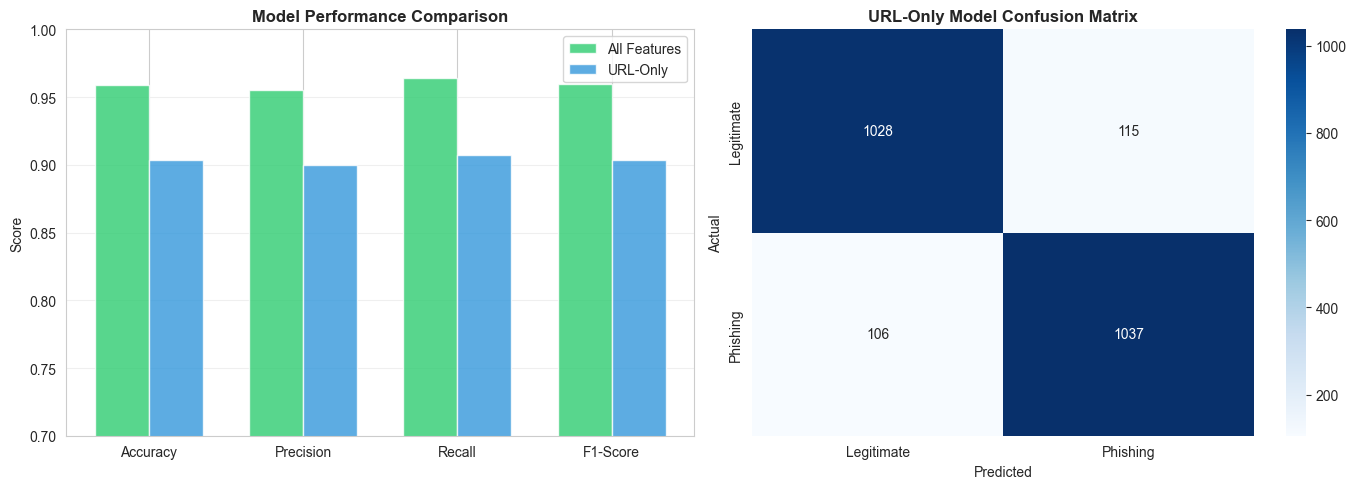


 FINAL VERDICT


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print(" MODEL COMPARISON: ALL FEATURES vs URL-ONLY FEATURES")
print("="*70)

y = df['status']

# ============================================================
# MODEL 1: ALL FEATURES (Maximum Accuracy, Not Deployable)
# ============================================================
print("\n[1/2] Training Model 1: ALL 88 FEATURES...")
print("-"*70)

X_all = df.drop(['url', 'status'], axis=1)
print(f"Features used: {X_all.shape[1]}")

X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train_all.shape}")
print(f"Test set: {X_test_all.shape}")

model_all = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)

# Metrics
acc_all = accuracy_score(y_test, y_pred_all)
prec_all = precision_score(y_test, y_pred_all)
rec_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)

print(f"\n✓ Results:")
print(f"  Accuracy:  {acc_all:.4f} ({acc_all*100:.2f}%)")
print(f"  Precision: {prec_all:.4f} ({prec_all*100:.2f}%)")
print(f"  Recall:    {rec_all:.4f} ({rec_all*100:.2f}%)")
print(f"  F1-Score:  {f1_all:.4f} ({f1_all*100:.2f}%)")

# ============================================================
# MODEL 2: URL-ONLY FEATURES (Deployable in Real-Time)
# ============================================================
print("\n" + "="*70)
print(f"[2/2] Training Model 2: {len(url_features)} URL-ONLY FEATURES...")
print("-"*70)

X_url = df[url_features]
print(f"Features used: {X_url.shape[1]}")

X_train_url, X_test_url, y_train, y_test = train_test_split(
    X_url, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train_url.shape}")
print(f"Test set: {X_test_url.shape}")

model_url = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
model_url.fit(X_train_url, y_train)
y_pred_url = model_url.predict(X_test_url)

# Metrics
acc_url = accuracy_score(y_test, y_pred_url)
prec_url = precision_score(y_test, y_pred_url)
rec_url = recall_score(y_test, y_pred_url)
f1_url = f1_score(y_test, y_pred_url)

print(f"\n✓ Results:")
print(f"  Accuracy:  {acc_url:.4f} ({acc_url*100:.2f}%)")
print(f"  Precision: {prec_url:.4f} ({prec_url*100:.2f}%)")
print(f"  Recall:    {rec_url:.4f} ({rec_url*100:.2f}%)")
print(f"  F1-Score:  {f1_url:.4f} ({f1_url*100:.2f}%)")

# ============================================================
# COMPARISON & VERDICT
# ============================================================
print("\n" + "="*70)
print(" PERFORMANCE COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'All Features': [acc_all, prec_all, rec_all, f1_all],
    'URL-Only': [acc_url, prec_url, rec_url, f1_url],
    'Difference': [
        acc_all - acc_url,
        prec_all - prec_url,
        rec_all - rec_url,
        f1_all - f1_url
    ]
})
comparison_df['Difference %'] = comparison_df['Difference'] * 100

print(comparison_df.to_string(index=False))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
all_scores = [acc_all, prec_all, rec_all, f1_all]
url_scores = [acc_url, prec_url, rec_url, f1_url]

x = np.arange(len(metrics))
width = 0.35

ax1.bar(x - width/2, all_scores, width, label='All Features', color='#2ecc71', alpha=0.8)
ax1.bar(x + width/2, url_scores, width, label='URL-Only', color='#3498db', alpha=0.8)
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.set_ylim([0.7, 1.0])
ax1.grid(axis='y', alpha=0.3)

# Confusion matrices side by side
cm_all = confusion_matrix(y_test, y_pred_all)
cm_url = confusion_matrix(y_test, y_pred_url)

# Just show URL-only confusion matrix (the one we care about)
sns.heatmap(cm_url, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
ax2.set_title('URL-Only Model Confusion Matrix', fontweight='bold')
ax2.set_ylabel('Actual')
ax2.set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('../models/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# FINAL VERDICT
# ============================================================
print("\n" + "="*70)
print(" FINAL VERDICT")
print("="*70)

if acc_url >= 0.90:
    verdict = "EXCELLENT"
    color = "✓"
    decision = "Proceed with URL-only model - performance is outstanding!"
elif acc_url >= 0.85:
    verdict = "GOOD"
    color = "✓"
    decision = "Proceed with URL-only model - performance"


In [11]:
import sys
sys.path.append('../src')
from feature_extraction import PhishingFeatureExtractor

# Initialize extractor
extractor = PhishingFeatureExtractor()

# Test on 5 random URLs from dataset
print("="*70)
print(" VALIDATING FEATURE EXTRACTOR")
print("="*70)

sample_urls = df.sample(5, random_state=42)

for idx, row in sample_urls.iterrows():
    url = row['url']
    print(f"\nURL: {url[:60]}...")

    # Extract features
    extracted = extractor.extract_features(url)

    if extracted:
        # Compare with dataset
        mismatches = 0
        for feature in url_features:
            dataset_val = row[feature]
            extracted_val = extracted[feature]

            # Allow small float differences
            if abs(dataset_val - extracted_val) > 0.01:
                mismatches += 1
                if mismatches <= 3:  # Show first 3 mismatches
                    print(f"  ✗ {feature}: dataset={dataset_val}, extracted={extracted_val}")

        if mismatches == 0:
            print(f"  ✓ Perfect match! All {len(url_features)} features correct")
        else:
            print(f"  ⚠ {mismatches}/{len(url_features)} features mismatched")
    else:
        print("  ✗ Feature extraction failed")

print("\n" + "="*70)
print("If you see mostly ✓ or small differences, you're good to proceed!")
print("="*70)


 VALIDATING FEATURE EXTRACTOR

URL: https://www.rga.com/about/workplace...
  ✗ nb_com: dataset=0, extracted=1
  ✗ nb_dslash: dataset=0, extracted=1
  ✗ nb_subdomains: dataset=2, extracted=1
  ⚠ 3/42 features mismatched

URL: http://starasia.com.hk...
  ✗ nb_com: dataset=0, extracted=1
  ✗ nb_dslash: dataset=0, extracted=1
  ✗ https_token: dataset=1, extracted=0
  ⚠ 6/42 features mismatched

URL: https://www.youtube.com/watch?v=XszqITK-UEw...
  ✗ nb_com: dataset=0, extracted=1
  ✗ nb_dslash: dataset=0, extracted=1
  ✗ nb_subdomains: dataset=2, extracted=1
  ⚠ 6/42 features mismatched

URL: http://www.civico1845.com/...
  ✗ nb_com: dataset=0, extracted=1
  ✗ nb_dslash: dataset=0, extracted=1
  ✗ https_token: dataset=1, extracted=0
  ⚠ 5/42 features mismatched

URL: http://rapidpaws.com/wp-content/we_transfer/index2.php?email...
  ✗ nb_com: dataset=0, extracted=1
  ✗ nb_dslash: dataset=0, extracted=1
  ✗ https_token: dataset=1, extracted=0
  ⚠ 9/42 features mismatched

If you see mostly ✓